# <center>Тема 2.1
## <center>Нейронні мережі в Keras

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Keras_logo.svg/1200px-Keras_logo.svg.png' width="10%">

### <center>Загальні відомості

**Keras** — відкрита нейромережна бібліотека, написана мовою Python. Вона здатна працювати поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano та інших модулів. Keras дозволяє легко проводити  експерименти з мережами глибинного навчання. Основними меревагами є зручність в користуванні, модульність та розширюваність.

Автор бібліотеки - François Chollet, Deep learning researcher at Google.

- Повна документація за бібліотекою: https://keras.io/api/

Keras працює з усіма відомими архітектурами нейронних мереж.

Список модулів Keras:

- Layers - містить набір прошарків нейронних мереж
- Data preprocessing - для попередньої обробки даних
- Optimizers - набір оптимізаторів
- Metrics - набір метрик
- Losses - набір функцій втрат (критеріїв якості)
- Built-in small datasets - вбудовані набори даних
- та інші...

Послідовність кроків для створення нейронної мережі:

- 1) Описати архітектуру мережі
- 2) Описати вхідні значення
- 3) Описати умови навчання (Compilation)
- 4) Навчити (кілька разів?)
- 5) Оцінити якість моделі
- 6) Застосувати

### <center>Приклад створення нейромережі

Розглянемо приклад. Необхідно створити нейронну мережу для класифікації мобільних телефонів за ціновою категорією (всього є 4 класи: 0 - найдешевші моделі, 1 - більш дорогі ... 3 - найбільш дорогі).

Перш за все, потрібно імпортувати необхідні модулі.

In [32]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from tensorflow.keras.models import Sequential # модель прямого розповсюдження
from tensorflow.keras.layers import Dense # повнозв'язні прошарки

Наступний код тільки для старих відеокарт (щоб працювало без помилок)

In [15]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Завантажуємо навчальні дані.

In [33]:
data = pd.read_csv("D:/Drive/ІІС/Datasets/Classification/phones_price.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Перевіряємо, наскільки збалансована кількість зразків кожного класу. В ідеальному випадку, доля зразків кожного класу має бути приблизно однаковою.

In [34]:
data['price_range'].value_counts(normalize=True)

0    0.25
1    0.25
2    0.25
3    0.25
Name: price_range, dtype: float64

Як бачимо, у нас 21 стовпець даних. З них перші 20 - змінні X, останній стовпець - клас телефону (цінова категорія), Y.

Запишемо стовпці з характеристиками об'єктів до змінної X.

In [35]:
X = data.drop('price_range', axis = 1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


А також створимо змінну з правильними відповідям Y. Для цього переведемо стовпець *price_range* з початкової таблиці до формату **one hot encoding**.

In [36]:
Y = pd.get_dummies(data.price_range, prefix='Price range')
Y

,Price range_0,Price range_1,Price range_2,Price range_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


Розділимо отриманий набір даних на навчальну і тестову множини.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

Виконаємо стандартизацію значень змінних X, привівши кожен стовпець до нульового середнього значення та одиничної дисперсії.

In [38]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

Створюємо послідовну модель:

In [39]:
model = Sequential()

Додаємо перший прихохваний прошарок `Dense`. В якості аргументів спочатку вказуємо кількість нейронів в прихованому прошарку, потім розмірність вхадного вектора (скільки характеристик X), а також активаційну функцію. В Keras доступні такі активаційні функції:

- relu 
- sigmoid 
- softmax 
- softplus 
- softsign 
- tanh 
- selu 
- elu 
- exponential  

Використовуємо *relu*.

In [40]:
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))

Додаємо другий прихований прошарок. Вказуємо тільки кількість нейронів у ньому та активаційну функцію *relu*.

In [41]:
model.add(Dense(5, activation="relu"))

Додаємо вихідний прошарок. Кількість нейронів у ньому має відповідати кількості класів (якщо використовується формат one hot encoding). Активаційна функція для задачі класифікації - *softmax*.

In [42]:
model.add(Dense(4, activation="softmax"))

Описуємо умови навчання. Обов'язково потрібно задати оптимізатор, критерій якості (функцію помилки, яку будемо мінімізовувати) та метрику (показник, за яким зручно оцінювати якість навчання).

В Keras доступні оптимізатори:

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

Зараз найчастіше використовується *Adam*.

В якості функцій втрат в Keras доступні різні варіанти, але для задач класифікації використовуємо такі:
- *binary_crossentropy* - для бінарної класифікації (коли всього два класи)
- *categorical_crossentropy* - для категоріальної класифікації (коли багато класів)

Метрики, які найчастіше використовуюься для класифікації:
- *Accuracy* (доля правильних відповідей серед всіх зразків)
- *Precision* (як багато з обраних елементів дійсно є правильними?)
- *Recall* (як багато елементів було обрано серед загальної кількості елементів, які потрібно було обрати)

Обираємо метрику *accuracy*.

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Навчаємо модель. Лог навчання запишемо до змінної `history`. Необхідно обов'язково вказати наступні аргументи: навчальний набір даних (`X_train`), правильні відповіді для цього набору (`Y_train`), кількість епох `epochs`, обсяг вибірки валідації `validation_split` (по відношенню до тестової вибірки). Також вкажемо розмір батчу `batch_size` та режим відображення `verbose=2`, щоб виводити повну інформацію про навчання.

In [45]:
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, verbose=2)

Epoch 1/50
91/91 - 0s - loss: 1.3107 - accuracy: 0.4173 - val_loss: 1.1808 - val_accuracy: 0.5137
Epoch 2/50
91/91 - 0s - loss: 1.1664 - accuracy: 0.5010 - val_loss: 1.0731 - val_accuracy: 0.5451
Epoch 3/50
91/91 - 0s - loss: 1.0377 - accuracy: 0.5578 - val_loss: 0.9576 - val_accuracy: 0.6000
Epoch 4/50
91/91 - 0s - loss: 0.9103 - accuracy: 0.5958 - val_loss: 0.8569 - val_accuracy: 0.6078
Epoch 5/50
91/91 - 0s - loss: 0.8012 - accuracy: 0.6339 - val_loss: 0.7690 - val_accuracy: 0.6471
Epoch 6/50
91/91 - 0s - loss: 0.7087 - accuracy: 0.6817 - val_loss: 0.6905 - val_accuracy: 0.6941
Epoch 7/50
91/91 - 0s - loss: 0.6290 - accuracy: 0.7543 - val_loss: 0.6222 - val_accuracy: 0.7373
Epoch 8/50
91/91 - 0s - loss: 0.5586 - accuracy: 0.7945 - val_loss: 0.5600 - val_accuracy: 0.7922
Epoch 9/50
91/91 - 0s - loss: 0.4933 - accuracy: 0.8339 - val_loss: 0.5006 - val_accuracy: 0.8196
Epoch 10/50
91/91 - 0s - loss: 0.4377 - accuracy: 0.8567 - val_loss: 0.4513 - val_accuracy: 0.8392
Epoch 11/50
91/91 -

Оцінюємо якість моделі на тестовій множині. Запишемо результат до змінних `loss` та `accuracy`.

In [46]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

0.2462047040462494 0.8999999761581421


Виводимо графік з історією навчання для оцінки ефекктивності навчання.

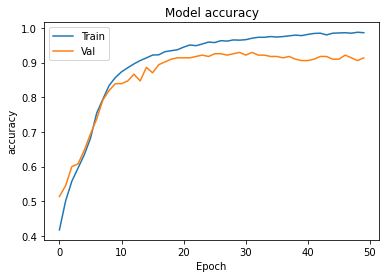

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Використовуємо модель для класифікації одного зразка з тестової вибірки.

In [48]:
# Зразок треба подати як список, тому робимо зріз
sample = X_test[0:1]
prediction = model.predict(sample)
print(prediction)

[[9.9032718e-01 9.6725617e-03 2.8166394e-07 2.7089658e-22]]


Оформимо красиво:

In [49]:
score = np.max(prediction)
prediction = np.argmax(prediction)

print(f'Передбачено: {prediction} з достовірністю {score*100:.2f}%', f'Повинно бути: {np.argmax(Y_test[0:1])}', sep='\n')

Передбачено: 0 з достовірністю 99.03%
Повинно бути: 0


Збережемо модель.

In [ ]:
model.save('mobile_price.h5')